In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/fakta_lovbrudd_Norge.csv')

### **Get data and fill in missing values**

In [ ]:
del df['Unnamed: 0']

In [ ]:
df_copy = df.copy()

INDEX

In [ ]:
df_copy['dato'] = pd.to_datetime(df_copy['år'], format='%Y', )

***New columns and lag***

In [ ]:
# df_copy = df_copy.sort_values(['lovbruddstype', 'dato'])
# df_copy['Value i %'] = df_copy['value'].pct_change()
# df_copy['lag_1'] = df_copy['Value i %'].shift(1)
# df_copy['lag_2'] = df_copy['lag_1'].shift(2)
# df_copy['lag_3'] = df_copy['lag_2'].shift(3)

# df_copy['endring'] = df_copy['value'] - df_copy['året før']
# df_copy['% endring fra året før'] = df_copy['endring'].pct_change()

In [ ]:
df_copy = df_copy.fillna(0)

### **Data prep.**

### **OneHotEncoder**

In [ ]:
y_2d = np.array(df_copy['lovbruddstype']).reshape(-1,1)

class_ohe = OneHotEncoder(sparse=False)
class_ohe.fit(y_2d)
ohe_lovbrudd = class_ohe.transform(y_2d)

In [ ]:
header_list = class_ohe.categories_

In [ ]:
ohe_lovbrudd_df = pd.DataFrame(ohe_lovbrudd, columns=header_list)
ohe_lovbrudd_df = ohe_lovbrudd_df.reset_index()

In [ ]:
# [col[0][1:] if i!=0 else col[0] for i, col in enumerate(ohe_lovbrudd_df.columns)]

In [ ]:
full_df_col = [col[0][1:] if i!=0 else col[0] for i, col in enumerate(ohe_lovbrudd_df.columns)]+['value',	'lovbruddstype',	'år',	'dato']

full_df = pd.concat([ohe_lovbrudd_df, df_copy[['value',	'lovbruddstype',	'år',	'dato']]], axis=1, join='outer')
full_df.columns = full_df_col

In [ ]:
#full_df = full_df.set_index('dato')

In [ ]:
del full_df['index']
del full_df['lovbruddstype']
del full_df['år']
full_df.head(2)

,Alkohollovovertredelse,"Alkohollovovertredelse, i alt",Allmennfarlig forbrytelse,Allmennfarlig forgiftning og alvorlig miljølovbrudd,Andre eller uspesifiserte trusler,Annen bruk og besittelse av andres eiendel,Annen eller uspesifisert dokument- og ID-krenkelse,Annen eller uspesifisert integritetskrenkelse,Annen eller uspesifisert myndighetskrenkelse,Annen eller uspesifisert ordensforstyrrelse,Annen eller uspesifisert straffelovgivning,Annen eller uspesifisert utlendingslovgivning,Annen eller uspesifisert veitrafikkovertredelse,Annen seksuell handling uten samtykke,Annen seksuell omgang,Annen transport- og trafikklovgivning,Annen vold og mishandling,Annet eller uspesifisert brukstyveri av motorkjøretøy,Annet eller uspesifisert grovt tyveri,Annet eller uspesifisert heleri og hvitvasking,Annet eller uspesifisert mindre skadeverk,Annet eller uspesifisert mindre tyveri,Annet eller uspesifisert ran og utpressing,Annet eller uspesifisert rusmiddellovbrudd,Annet eller uspesifisert seksuallovbrudd,Annet eller uspesifisert skadeverk,Annet eller uspesifisert tyveri,Annet eller uspesifisert voldslovbrudd,Annet eller uspesifisert våpenlovbrudd,Annet grovt skadeverk,Annet grovt tyveri,Annet lovbrudd,Annet natur- og miljølovbrudd,Annet næringslivs- og økonomilovbrudd,Annet pålegg fra politi og annen myndighet,Annet simpelt tyveri,Annet vinningslovbrudd,"Annet, allmennfarlig forbrytelse","Annet, bedrageri og utroskap","Annet, brukstyveri av motorkjøretøy",...,"Tyveri, i alt",Uaktsom forvoldelse av død,Uaktsom forvoldelse av ildebrann,Uaktsom kroppsskade,Uaktsom legemsbeskadigelse,Uaktsomt drap,Uaktsomt påført betydelig skade eller død,Uberettiget adgang og opphold,Ulovlig hastighet,Ulovlig påvirkning av offentlig tjenestemann,Underslag,"Underslag, i alt",Uriktig anklage,Uriktig forklaring,Uriktig forklaring og anklage,Urinering,Uten gyldig førerkort,Utlendingslovgivning,Utpressing,Utpressing og ran,Utroskap,Veitrafikkovertredelse,Vinningsforbrytelse i den offentlig tjeneste,Vold mot offentlig tjenestemann,Vold og mishandling,Voldslovbrudd,Voldtekt,"Voldtekt, annen eller uspesifisert alder","Voldtekt, barn under 14 år","Voldtekt, forsøk","Voldtekt, i alt",Voldtektsforsøk,"Våpen-, brann- og eksplosivlovgivning",Åger og lykkespill,Ærekrenkelse,Økonomisk utroskap,lle lovbruddstyper,lle typer lovbrudd,value,dato
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1451.0,1996-01-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,1996-01-01


In [ ]:
full_df

In [ ]:
full_df.to_csv('full_dataset_lovbrudd_Norge.csv', encoding='utf-8', sep=',', index=False)

In [ ]:
ML_df = full_df
DL_df = full_df

### **ML**

In [ ]:
ML_df = ML_df.fillna(0)

In [ ]:
full_df = ML_df
full_df = full_df.set_index('dato')

***Kun en X-verdi***

In [ ]:
X_df = full_df[['lle lovbruddstyper']]
y_df = full_df['value']

In [ ]:
full_df.head(1)

***Flere X-verdier***

In [ ]:
del full_df['index']

In [ ]:
X_df =  full_df.loc[:, full_df.columns != 'value']
X_df =  full_df.loc[:, full_df.columns != 'lovbruddstype']
X_df =  full_df.loc[:, full_df.columns != 'år']

y_df = full_df['value']

In [ ]:
X_df

***Split dataset to train and test set***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=420)

In [ ]:
X_train = np.c_[X_train]
X_test = np.c_[X_test]

# X_train = np.nan_to_num(X_train)
# X_test = np.nan_to_num(X_test)


In [ ]:
y_train = np.c_[y_train]
y_test = np.c_[y_test]

# y_train = np.nan_to_num(y_train)
# y_test = np.nan_to_num(y_test)

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (5150, 375)
y_train:  (5150, 1)
X_test:  (1288, 375)
y_test:  (1288, 1)


In [ ]:
# y_train = y_train.astype(int)
# X_train = X_train.astype(int)

### **Models**

In [ ]:
def rmse_mae_and_r2(model,x,y, y_pred):
  rmse = (np.sqrt(mean_squared_error(y, y_pred)))
  r2 = r2_score(y, y_pred)
  ame = mean_absolute_error(y, y_pred)
  print("The model performance")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('MAE is {}'.format(ame))
  print('R2 score is {} '.format(r2))
  print("\n")

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
rmse_mae_and_r2(clf,X_test, y_test, y_pred)

The model performance
--------------------------------------
RMSE is 32414.566872249394
MAE is 7076.212732919254
R2 score is 0.8521443921056105 




In [ ]:
lr_mode = LinearRegression()
lr_mode.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_y_preds = lr_mode.predict(X_test)

In [ ]:
rmse_mae_and_r2(model=lr_mode, x=X_test, y=y_test, y_pred=lr_y_preds)  

The model performance
--------------------------------------
RMSE is 17138.64199709704
MAE is 3603.804347826087
R2 score is 0.958665739753149 




In [ ]:
score_df = pd.DataFrame()

In [ ]:
lr_mode.intercept_

array([1.40510305e+17])

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_r = xgb_model.predict(X_test)

[12:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse_mae_and_r2(model=xgb_model, x=X_test, y=y_test, y_pred=y_pred_r)  

The model performance
--------------------------------------
RMSE is 22319.24183689927
MAE is 12676.647520077155
R2 score is 0.9299002883835772 




Text(0, 0.5, 'y_pred_r')

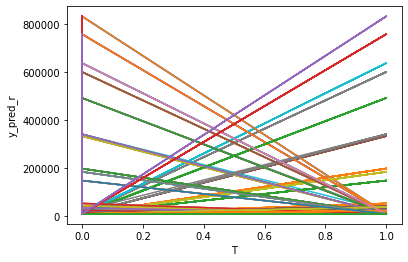

In [ ]:
plt.plot(X_test,y_pred_r)
plt.xlabel('T')
plt.ylabel('y_pred_r')

# **DL**

In [ ]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LSTM, SimpleRNN, Embedding, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder,  MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
tf.keras.backend.clear_session()

***Kun en X-verdi***

In [ ]:
DL_date_index_df = DL_df.set_index('dato')

In [ ]:
X_df = DL_date_index_df['lle typer lovbrudd']
y_df = DL_date_index_df['value']

In [ ]:
y_df

***Flere X-verdier***

In [ ]:
X_df_all = DL_date_index_df.loc[:, DL_date_index_df.columns != 'value']
y_df_all = DL_date_index_df['value']

In [ ]:
def create_dataset(X, y, date_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - date_steps):
        v = X.iloc[i:(i + date_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + date_steps])
    return np.array(Xs), np.array(ys)

date_steps=25
    
X_train_, y_train_ = create_dataset(X_df_all, y_df_all, date_steps)


In [ ]:
X_train_.shape

(6413, 25, 375)

In [ ]:
print('X_train.shape: ' , X_train_.shape)
print('y_train.shape: ' , y_train_.shape)

# print('X_val.shape: ' , X_test_.shape)
# print('y_val.shape: ' , y_test_.shape)

X_train.shape:  (6413, 25, 376)
y_train.shape:  (6413,)


**Model** LSTM

***DL 3 inputs og en output***

In [ ]:
X_input = Input(shape=(3, 2))
X_input_cat = Input(shape=(1,1))
X_input_shop = Input(shape=(1,1))

embedding_layer_cat = Embedding(84, 8)(X_input_cat)
embedding_layer_shop = Embedding(60, 5)(X_input_shop)

X_prep_concat = tf.keras.layers.Concatenate()( [X_input, X_input_cat, X_input_shop])

LSTM_layer = LSTM(128)(X_prep_concat)
output = Dense(1)(LSTM_layer)


model = Model(inputs =[X_input, X_input_cat, X_input_shop], outputs=output)

***DL 1 unput og en output***

In [ ]:
X_input = Input(shape=(25, 375))
LSTM_layer = LSTM(128)(X_input)
dense1 = Dense(100)(LSTM_layer)
dense2 = Dense(50)(dense1)
output = Dense(1)(dense2)

In [ ]:
model = Model(inputs =[X_input], outputs=output)

In [ ]:
model.compile(optimizer='adam',  loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25, 375)]         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               258048    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 276,049
Trainable params: 276,049
Non-trainable params: 0
_________________________________________________________________


***fit ot model***

In [ ]:
checkpoint_filepath = '/content/BEST MODEL'

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_score', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
history = model.fit(X_train_, y_train_, epochs=34, validation_split=0.2,callbacks=[model_checkpoint] )

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend(loc='lower right')